# Code construction etc

## Load packages and scripts

In [1]:
# activate packages set environment 
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.activate(".")

  Activating project at `c:\Users\Lukas\Desktop\TopologicalDataAnalysis\ShapeDetectionGit\Detecting-Shapes`
  0 dependencies successfully precompiled in 6 seconds. 282 already precompiled.
  1 dependency errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`
  Activating project at `c:\Users\Lukas\Desktop\TopologicalDataAnalysis\ShapeDetectionGit\Detecting-Shapes`


In [52]:
# include src files 
include("src/filtration.jl")
import .Filtration
include("src/preprocessing.jl")
import .Preprocessing
include("src/visualization.jl")
import .Visualization
include("src/persistence.jl")
import .Persistence

In [3]:
using Clustering
using StatsPlots
using LinearAlgebra

## Load data

In [ ]:
shapes = ["circle", "sphere", "torus", "line_segment"]#, "disk", "potato", "ellipsoid"]
path_changes = Dict("line_segment" => "line")
n_pershape = [1,12,23] 
n_datapoints = 10
good_layout = (3,2)

pointclouds = []
corr_results = []
for s in shapes 
    for i in n_pershape
        push!(corr_results, s*"_"*lpad(i,4,'0'))
        # load the data 
        if s in keys(path_changes) 
            path = "data\\"*s*"\\samples\\"*path_changes[s]*"_"*lpad(i,4,'0')*".csv"
        else 
            path = "data\\"*s*"\\samples\\"*s*"_"*lpad(i,4,'0')*".csv"
        end 
        println(path)
        df = Preprocessing.load_pointcloud_csv(path)
        if n_datapoints != "end"
            df = df[1:n_datapoints,:]
        end 
        points = [tuple(df[i, :]...) for i in axes(df, 1)]
        push!(pointclouds, points)
    end 
end 
        

data\circle\samples\circle_0001.csv


data\circle\samples\circle_0012.csv
data\circle\samples\circle_0023.csv
data\sphere\samples\sphere_0001.csv
data\sphere\samples\sphere_0012.csv
data\sphere\samples\sphere_0023.csv
data\torus\samples\torus_0001.csv
data\torus\samples\torus_0012.csv
data\torus\samples\torus_0023.csv
data\line_segment\samples\line_0001.csv
data\line_segment\samples\line_0012.csv
data\line_segment\samples\line_0023.csv


## Compute Persistence Diagrams 

In [5]:
#diagrams = Persistence.create_persistence_diagram(pointclouds, "Ripserer", true)

## Compute Wasserstein Distance Matrix

In [220]:
D_wasser = Persistence.create_wasserstein_matrix(diagrams)

3-element Vector{Matrix{Float64}}:
 [0.0 1.0072662818403597 … 18.31346402351246 19.164395623002797; 1.0072662818403597 0.0 … 18.360078944625446 19.19703664904526; … ; 18.31346402351246 18.360078944625446 … 0.0 2.1857123781611745; 19.164395623002797 19.19703664904526 … 2.1857123781611745 0.0]
 [0.0 0.05607851787430443 … 4.670338281380225 5.0498933311508125; 0.05607851787430443 0.0 … 4.651655868636677 5.031210918407266; … ; 4.670338281380225 4.651655868636677 … 0.0 1.6780759051572836; 5.0498933311508125 5.031210918407266 … 1.6780759051572836 0.0]
 [0.0 0.21767650529598725 … 0.4201602258300454 0.45055740932411736; 0.21767650529598725 0.0 … 0.3881811942153206 0.41857837770939255; … ; 0.4201602258300454 0.3881811942153206 … 0.0 0.030397183494071944; 0.45055740932411736 0.41857837770939255 … 0.030397183494071944 0.0]

In [221]:
D_wasser[1]

15×15 Matrix{Float64}:
  0.0        1.00727   0.980036  48.6085   …  20.5609   18.3135   19.1644
  1.00727    0.0       1.10232   48.3524      20.5874   18.3601   19.197
  0.980036   1.10232   0.0       48.7563      20.7091   18.4581   19.2837
 48.6085    48.3524   48.7563     0.0         36.9783   38.2807   38.4847
 47.9467    47.688    48.0893     3.53698     36.1407   37.4334   37.6461
 48.4758    48.2282   48.6296     4.60507  …  37.4913   38.5566   38.8763
 65.8101    65.3632   65.8317    24.5494      58.615    59.3803   59.8433
 59.6534    59.3648   59.7695    19.0588      51.3822   52.1639   52.6179
 60.4561    60.1434   60.5599    16.7663      51.2294   52.1705   52.5463
  4.03148    4.10216   3.78684   51.9268      24.2807   22.0288   22.8551
  4.01891    4.00011   3.88756   51.6568   …  24.3575   22.1029   22.9495
  3.89003    3.95885   3.67187   51.8804      24.1622   21.9045   22.7408
 20.5609    20.5874   20.7091    36.9783       0.0       3.62834   2.43263
 18.3135    18.

## Create Persistence Silhouette

In [ ]:
include("src/persistence.jl")
import .Persistence

In [53]:
silhouttes = Persistence.create_diagram_silhoutte(pointclouds[1:2])

Pointcloud No. 1


LoadError: DimensionMismatch: matrix is not square: dimensions are (400, 3)

In [ ]:
silhouettes = Persistence.create_persistence_silhoutte(diagrams, (0.2,0.6,0.2))

35-element Vector{Any}:
 Any[0.0, 0.0018413262968331894, 0.003674136101789763, 0.005488776181168806, 0.007224548058961064, 0.008790979451439918, 0.010234193609803151, 0.011513062857004671, 0.012637184586737737, 0.013714554945848403  …  0.0006523910966721622, 0.0005799031970419301, 0.000507415297411698, 0.0004349273977814293, 0.00036243949815119715, 0.00028995159852096504, 0.00021746369889073293, 0.00014497579926046422, 7.248789963023211e-5, 0.0]
 Any[0.0, 0.0013802080976940835, 0.0027575788845579405, 0.004112314309928733, 0.005442642925421291, 0.006729231002272461, 0.007932984311262896, 0.009023662152907118, 0.010082957580964695, 0.011049029785665482  …  0.0011606097081353702, 0.0010134247743157766, 0.0008662398404961832, 0.0007190549066765151, 0.0005718699728569217, 0.00042468503903725363, 0.0002775001052176601, 0.0001521372743543347, 7.606863717714814e-5, 0.0]
 Any[0.0, 0.0015194440561792765, 0.0030338249288124255, 0.004540627653281362, 0.006004933703681849, 0.007390818026288643, 0.0

5


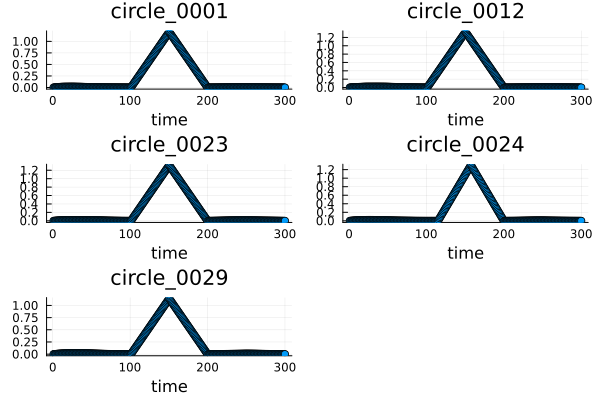

10


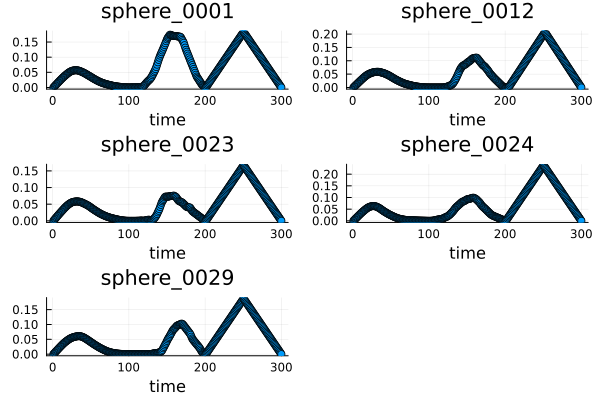

15


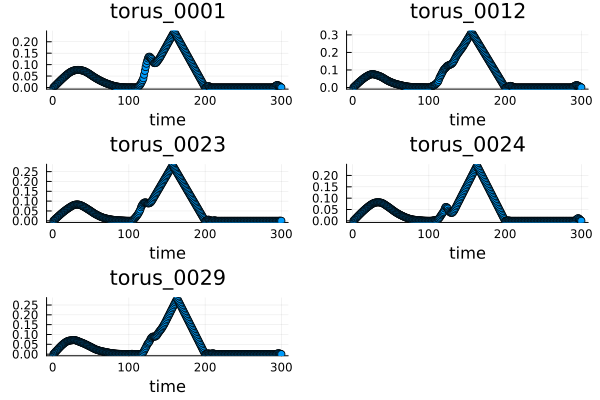

20


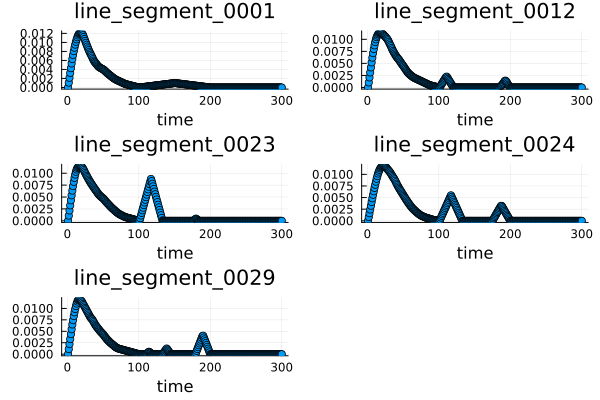

25


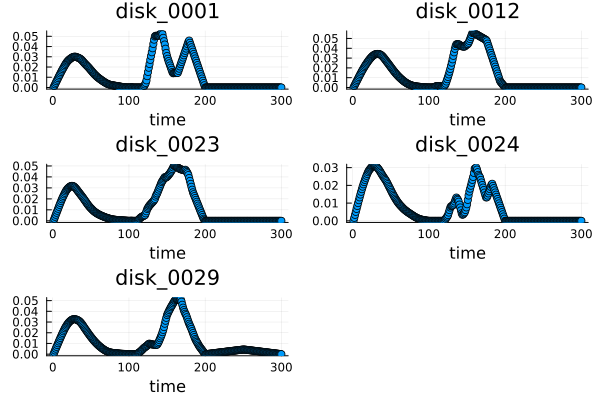

30


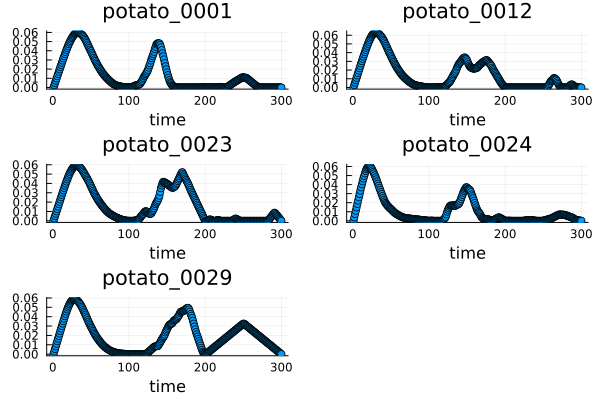

35


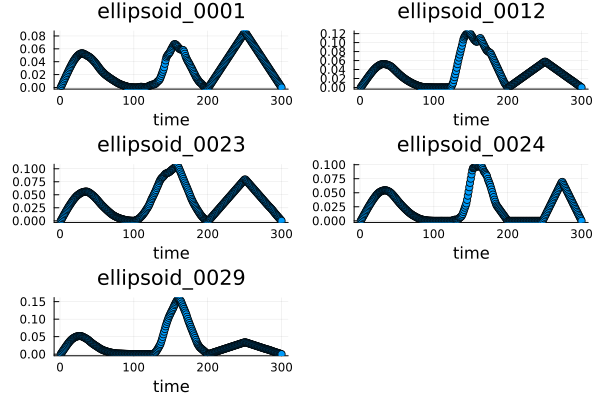

In [345]:
plots = []

for (i,sil) in enumerate(silhouettes) 
    ttl = corr_results[i]
    push!(plots,Visualization.plot_persistence_silhouette_approx(sil; ttl = ttl))
    if i%length(n_pershape) == 0
        println(i)
        display(plot(plots[(i-length(n_pershape)+1):i]..., layout = good_layout))
    end
end 

# Clustering 

### Hirachical

#### on Distance Matrices 

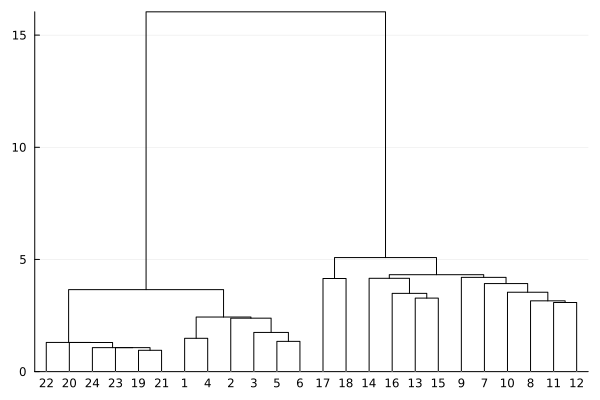

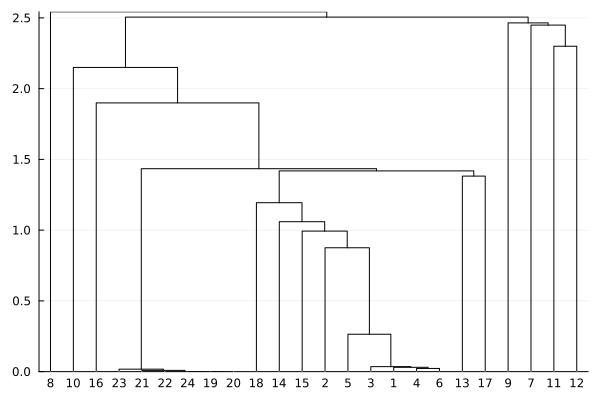

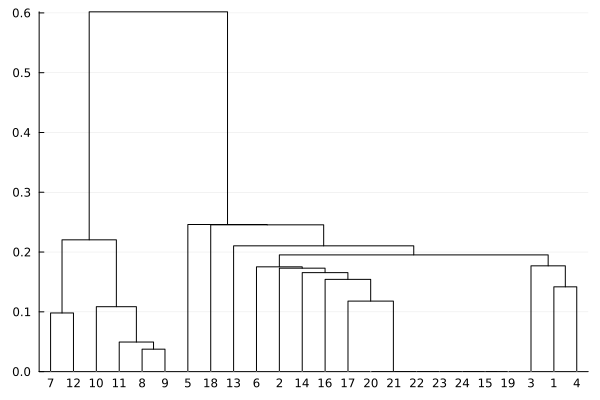


Results for H_0
Cluster 1---------
Any["circle_0001", "circle_0002", "circle_0003", "circle_0004", "circle_0005", "circle_0006", "line_segment_0001", "line_segment_0002", "line_segment_0003", "line_segment_0004", "line_segment_0005", "line_segment_0006"]
Cluster 2---------
Any["sphere_0001", "sphere_0002", "sphere_0003", "sphere_0004", "sphere_0005", "sphere_0006"]
Cluster 3---------
Any["torus_0001", "torus_0002", "torus_0003", "torus_0004"]
Cluster 4---------
Any["torus_0005", "torus_0006"]

Results for H_1
Cluster 1---------
Any["circle_0001", "circle_0002", "circle_0003", "circle_0004", "circle_0005", "circle_0006", "sphere_0004", "torus_0001", "torus_0002", "torus_0003", "torus_0004", "torus_0005", "torus_0006", "line_segment_0001", "line_segment_0002", "line_segment_0003", "line_segment_0004", "line_segment_0005", "line_segment_0006"]
Cluster 2---------
Any["sphere_0001", "sphere_0005", "sphere_0006"]
Cluster 3---------
Any["sphere_0002"]
Cluster 4---------
Any["sphere_0003"]

R

In [ ]:
dim = length(pointclouds[1][1])
clusterings_wasser = []
for D in D_wasser 
    r = hclust(D)
    push!(clusterings_wasser, r)
end 
clusters_wasser = []
for r in clusterings_wasser 
    display(plot(r))
    push!(clusters_wasser, cutree(r; k = length(shapes)))
end 
for hi in 1:length(clusters_wasser)
    println("")
    println("Results for H_", (hi-1))
    for shape_idx in 1:length(shapes)
        println("Cluster ",shape_idx,"---------")
        println(corr_results[clusters_wasser[hi] .== shape_idx])
    end 
end


#### on silhuettes 

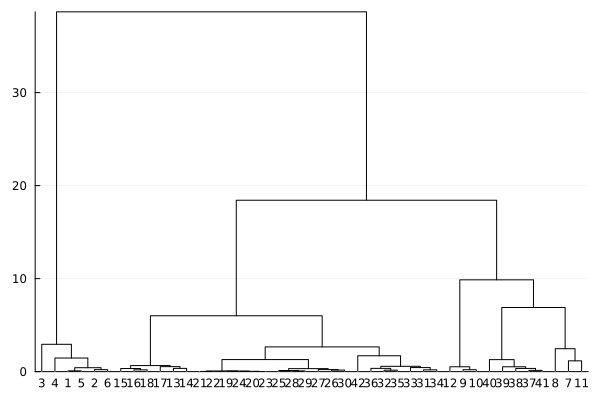

Cluster 1---------
Any["circle_0001", "circle_0002", "circle_0004", "circle_0005", "circle_0006"]
Cluster 2---------
Any["circle_0003"]
Cluster 3---------
Any["sphere_0001", "sphere_0002", "sphere_0005"]
Cluster 4---------
Any["sphere_0003", "sphere_0004", "sphere_0006"]
Cluster 5---------
Any["torus_0001", "torus_0002", "torus_0003", "torus_0004", "torus_0005", "torus_0006"]
Cluster 6---------
Any["line_segment_0001", "line_segment_0002", "line_segment_0003", "line_segment_0004", "line_segment_0005", "line_segment_0006", "disk_0001", "disk_0002", "disk_0003", "disk_0004", "disk_0005", "disk_0006", "potato_0001", "potato_0002", "potato_0003", "potato_0004", "potato_0005", "potato_0006", "ellipsoid_0006"]
Cluster 7---------
Any["ellipsoid_0001", "ellipsoid_0002", "ellipsoid_0003", "ellipsoid_0004", "ellipsoid_0005"]


In [312]:
D_sil = zeros(length(silhouettes), length(silhouettes))
for (i, sil) in enumerate(silhouettes) 
    for j in 1:i-1
        D_sil[i,j] = norm(sil - silhouettes[j])
        D_sil[j,i] = norm(sil - silhouettes[j])
    end 
end 
res_clus_sil =  hclust(D_sil, linkage = :ward)
display(plot(res_clus_sil))
clusters_sil = cutree(res_clus_sil; k = length(shapes)) # k = NUMBER OF CLUSTERS 
for cluster_idx in unique(clusters_sil)
    println("Cluster ",cluster_idx,"---------")
    println(corr_results[clusters_sil .== cluster_idx])
end
    


### dbscan clustering 

#### on silhouttes 

In [338]:
X = [Vector{Float64}(s) for s in silhouettes]
X = hcat(X...)
for i in 1:size(X)[2]
    # normalize each col
    if norm(X[:,i]) != 0
        X[:,i] = X[:,i] ./ norm(X[:,i])
    end 
end 
res_clus_sil =  dbscan(X, 0.4)
clusters_sil = res_clus_sil.assignments
for cluster_idx in unique(clusters_sil)
    println("Cluster ",cluster_idx,"---------")
    println(corr_results[clusters_sil .== cluster_idx])
end

Cluster 1---------
Any["circle_0001", "circle_0002", "circle_0003", "circle_0004", "circle_0005", "circle_0006", "torus_0001", "torus_0002", "torus_0003", "torus_0004", "torus_0005", "torus_0006", "disk_0002", "disk_0003", "disk_0004", "disk_0005", "disk_0006", "potato_0004", "potato_0005", "potato_0006", "ellipsoid_0003", "ellipsoid_0006"]
Cluster 2---------
Any["sphere_0001", "sphere_0002", "sphere_0004", "sphere_0006", "ellipsoid_0001", "ellipsoid_0002", "ellipsoid_0004", "ellipsoid_0005"]
Cluster 3---------
Any["sphere_0003"]
Cluster 4---------
Any["sphere_0005"]
Cluster 5---------
Any["line_segment_0001", "line_segment_0002", "line_segment_0003", "line_segment_0004", "line_segment_0005", "line_segment_0006", "potato_0003"]
Cluster 6---------
Any["disk_0001"]
Cluster 7---------
Any["potato_0001", "potato_0002"]


### k-means clustering 

#### on silhouttes 

In [346]:
# works great for circle, sphere, torus, line_segment, disk each 3 pointclouds
X = [Vector{Float64}(s) for s in silhouettes]
X = hcat(X...)
for i in 1:size(X)[2]
    # normalize each col
    if norm(X[:,i]) != 0
        X[:,i] = X[:,i] ./ norm(X[:,i])
    end 
end 
res_clus_sil = kmeans(X, length(shapes))
clusters_sil = res_clus_sil.assignments
for cluster_idx in unique(clusters_sil)
    println("Cluster ",cluster_idx,"---------")
    println(corr_results[clusters_sil .== cluster_idx])
end

Cluster 3---------
Any["circle_0001", "circle_0012", "circle_0023", "circle_0024", "circle_0029", "torus_0001", "torus_0012", "torus_0023", "torus_0024", "torus_0029", "disk_0012", "disk_0023", "ellipsoid_0029"]
Cluster 6---------
Any["sphere_0001", "ellipsoid_0001", "ellipsoid_0012", "ellipsoid_0023"]
Cluster 4---------
Any["sphere_0012", "sphere_0023", "sphere_0024", "sphere_0029"]
Cluster 2---------
Any["line_segment_0001", "line_segment_0012", "line_segment_0023", "line_segment_0024", "line_segment_0029", "potato_0001", "potato_0024"]
Cluster 7---------
Any["disk_0001"]
Cluster 5---------
Any["disk_0024", "potato_0012", "potato_0023"]
Cluster 1---------
Any["disk_0029", "potato_0029", "ellipsoid_0024"]


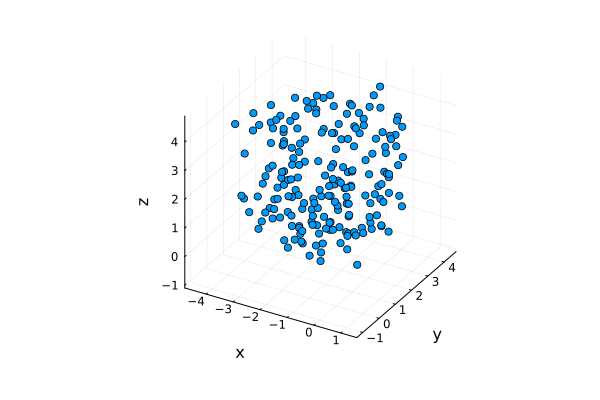

In [333]:
idx = findfirst( ==("potato_0006"), corr_results)
Visualization.plot_pointcloud_3d(pointclouds[idx], check_npoints = false)
